In [2]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image
from tqdm import tqdm
from scipy import ndimage

import torch.nn.functional as F
import torch as tc
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from helpers_img import *
from NeuralNets import *
from training_NN import *
from preprocessing import *
from dataset import *
from submission import *

Clean the cuda cache.

In [3]:
tc.cuda.empty_cache()

Train the U_net with the following parameters:

1. Learning Rate = 1e-4 

2. Maximum number of iteration = 25

3. Size of the mini batch = 1

4. Number of tests = 10

In [5]:
# Choose parameters
lr = 1e-4
max_epochs = 25
mini_batch_size=1
nb_test = 10
print('let\'s start to train the Net')

# Train the net
model = train_UNet('training/', lr, max_epochs, mini_batch_size,nb_test, do_preprocessing=True, model = None,
                  model_path = 'Model_UNet/model_CPU.pt')


The main idea here is to train the neural net more than one time, to have a better performance without overfitting. If you want to train more than one time, remember to modify the *train_UNet* parameters such as *model* = model we want to train again and *model_path* which must be consistent with the following load part.  

In [ ]:
# Save the model
model.cpu()
tc.save(model,'Model_UNet/model_CPU.pt')

In [ ]:
# Clean the model
model = tc.load('Model_UNet/model_CPU.pt')

In [ ]:
# Clean the model
model = tc.load('Model_UNet/model_CPU_v2.pt')

In [3]:
# Clean the model
model = tc.load('Model_UNet/model_CPU_v3.pt')

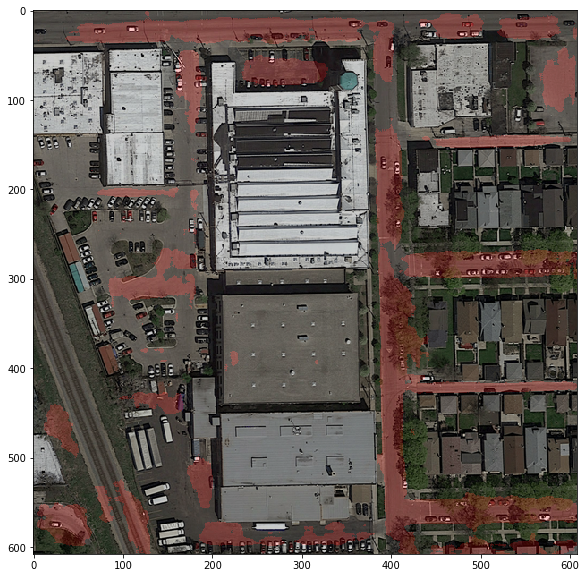

In [4]:
# Plot one single test image and the prediction we have obtained
print_image_test("test_set_images/", 1, model, do_prep=True)

In [9]:
# Create the submission file
create_submission_UNet("test_set_images/", model, 'third_submission.csv', do_preprocessing= True)